In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("res/training/Pacific_train.csv")
test = pd.read_csv("res/validation/Pacific_test.csv")

In [ ]:
train.head()

In [ ]:
test.shape

In [ ]:
test.columns.values

In [ ]:
test['Status'].unique()

In [ ]:
train.dtypes

In [ ]:
test.isnull().sum()

In [ ]:
train.describe()

In [ ]:
train.hist(figsize=(10,10))

In [ ]:
train.boxplot(figsize=(100,100))

In [ ]:
le = LabelEncoder()
train['Status'] = le.fit_transform(train['Status'])
test['Status'] = le.fit_transform(test['Status'])

In [ ]:
train['Status'].unique()

In [ ]:
test['Status'].unique()

In [ ]:
X_train = train.drop(['ID', 'Name', 'Event', 'Latitude', 'Longitude', 'Status'], axis=1)


In [ ]:
X_train.dtypes

In [ ]:
train.head()

In [ ]:
y_train = train['Status']

In [ ]:
y_train

In [ ]:
X_test = test.drop(['ID', 'Name', 'Event', 'Latitude', 'Longitude', 'Status'], axis=1)

In [ ]:
X_test.head()

In [ ]:
y_test = test['Status']

In [ ]:
y_test.head()

In [ ]:
"""models=[]
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cross_val_sc = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=kfold)
    print('{}: acc:{}'.format(name, cross_val_sc.mean()))
"""

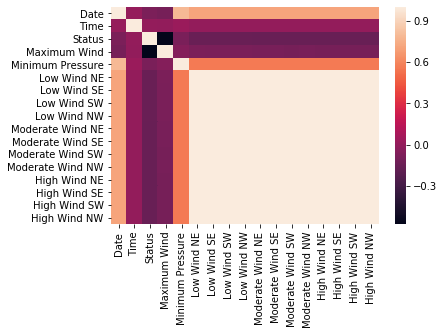

In [30]:
correlation = train.corr()
sns.heatmap(correlation)

In [ ]:
X_train_mod = X_train[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]

In [ ]:
X_test_mod = X_test[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]

In [ ]:
models=[]
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cross_val_sc = cross_val_score(model, X_train_mod, y_train, scoring='accuracy', cv=kfold)
    model.fit(X_train_mod, y_train)
    y_pred = model.predict(X_test_mod)
    con_mat = confusion_matrix(y_test, y_pred)
    clf_rep = classification_report(y_test, y_pred)
    print('{}:\n acc:{}\n cmatrix:\n{}\n clfrep:\n{}\n'.format(name, cross_val_sc.mean(), con_mat, clf_rep))